[IPython Notebook](MESH.ipynb) |  [Python Script](MESH.py)

'mesh' Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSet which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach this ParameterSet for us.

In [3]:
ps, constraints = phoebe.dataset.mesh()
print ps

ParameterSet: 1 parameters
                           times: [] d


### times

In [4]:
print ps['times']

Parameter: times
                       Qualifier: times
                     Description: Observed times
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to meshes

In [5]:
ps_compute = phoebe.compute.phoebe()
print ps_compute

ParameterSet: 20 parameters
                enabled@_default: True
                 dynamics_method: keplerian
                            ltte: False
                    irrad_method: wilson
                 boosting_method: none
                       protomesh: False
                          pbmesh: False
                         horizon: False
            mesh_method@_default: marching
                  delta@_default: 0.1
              maxpoints@_default: 100000
      distortion_method@_default: roche
                  eclipse_method: native
                  horizon_method: boolean
                    atm@_default: ck2004
              lc_method@_default: numerical
             fti_method@_default: None
  fti_oversample@_default@_de...: 5
     rv_method@_default@_default: flux-weighted
       rv_grav@_default@_default: False


### mesh_method

In [6]:
print ps_compute['mesh_method']

Parameter: mesh_method@_default
                       Qualifier: mesh_method
                     Description: 
                           Value: marching
                         Choices: marching



The 'mesh_method' parameter determines how each component in the system is discretized into its mesh, and has several options:
 * marching (default): this is the new method introduced in PHOEBE 2.  The star is discretized into triangles, with the attempt to make them each of equal-area and nearly equilateral.  Although not as fast as 'wd', this method is more robust and will always form a closed surface (when possible).
 * wd: this is a re-implementation of the Wilson-Devinney style meshing used in PHOEBE 1.0 (legacy), with the stars discretized into trapezoids in strips of latitude (we then split each trapezoid into two triangles).  This is faster, but suffers from gaps between the surface elements, and is mainly meant for testing and comparison with legacy.  See the [WD-Style Meshing Example Script](../examples/wd_mesh) for more details.

### delta

The 'delta' parameter is only relevenat if mesh_method=='marching' (so will not be available unless that is the case).

In [7]:
print ps_compute['delta']

Parameter: delta@_default
                       Qualifier: delta
                     Description: Stepsize for mesh generation via marching method
                           Value: 0.1
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: mesh_method:marching



### gridsize

The 'gridsize' parameter is only relevant if mesh_method=='wd' (so will not be available unless that is the case).

In [8]:
print ps_compute['gridsize']

ParameterSet: 0 parameters
NO PARAMETERS


Synthetics
------------------

In [9]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [10]:
b.run_compute()

<ParameterSet: 62 parameters | components: primary, secondary>

In [11]:
b['mesh@model'].twigs

['times@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@xs@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@ys@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@zs@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@pot@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@rpole@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@volume@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@vxs@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@vys@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@vzs@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@horizon_xs@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@horizon_ys@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@horizon_zs@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@horizon_analytic_xs@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@horizon_analytic_ys@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@horizon_analytic_zs@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@areas@primary@mesh01@phoebe01@latest@mesh@model',
 '0.0@tarea

### Per-Mesh Parameters

In [12]:
print b['times@primary@mesh01@model']

Parameter: times@primary@latest@model
                       Qualifier: times
                     Description: Synthetic times
                           Value: [ 0.] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### Per-Time Parameters

In [13]:
print b['volume@primary@mesh01@model']

Parameter: 0.0@volume@primary@latest@model
                       Qualifier: volume
                     Description: Volume of the stellar surface
                           Value: 4.2896942597 solRad3
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [14]:
print b['rpole@primary@mesh01@model']

Parameter: 0.0@rpole@primary@latest@model
                       Qualifier: rpole
                     Description: Polar radius of the stellar surface
                           Value: 1.0 solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [15]:
print b['pot@primary@mesh01@model']

Parameter: 0.0@pot@primary@latest@model
                       Qualifier: pot
                     Description: Equipotential of the stellar surface
                           Value: 6.28266165375
                  Constrained by: 
                      Constrains: None
                      Related to: None



### Per-Element Parameters

In [16]:
print b['vertices@primary@mesh01@model']

Parameter: 0.0@vertices@primary@latest@model
                       Qualifier: vertices
                     Description: Vertices of triangles
                           Value: [[[  9.97880962e-17   9.97880962e-17  -1.62966328e+00]
  [ -9.95970365e-02   1.00097451e-16  -1.63471544e+00]
  [ -4.97963613e-02  -8.62447060e-02  -1.63475791e+00]]

 [[  9.97880962e-17   9.97880962e-17  -1.62966328e+00]
  [ -4.97963613e-02  -8.62447060e-02  -1.63475791e+00]
  [  4.97963080e-02  -8.62446123e-02  -1.63475896e+00]]

 [[  9.97880962e-17   9.97880962e-17  -1.62966328e+00]
  [  4.97963080e-02  -8.62446123e-02  -1.63475896e+00]
  [  9.95974330e-02   1.36723151e-16  -1.63471153e+00]]

 ..., 
 [[  5.61853256e-01  -3.55065528e-01  -3.41493532e+00]
  [  5.60791587e-01  -2.05429678e-01  -3.47056249e+00]
  [  6.44931275e-01  -3.04798417e-01  -3.36974668e+00]]

 [[  4.67053689e-01  -3.21876977e-01  -3.49071164e+00]
  [  5.60791587e-01  -2.05429678e-01  -3.47056249e+00]
  [  5.61853256e-01  -3.55065528e-01 

In [17]:
print b['xs@primary@mesh01@model']

Parameter: 0.0@xs@primary@latest@model
                       Qualifier: xs
                     Description: X coordinate of center of triangles
                           Value: [ -4.98289502e-02   1.09168683e-16   4.98289502e-02 ...,   5.90313308e-01
   5.31022578e-01   4.93276702e-01] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [18]:
print b['rs@primary@mesh01@model']

Parameter: 0.0@rs@primary@latest@model
                       Qualifier: rs
                     Description: Distance of each triangle from center of mass
                           Value: [ 0.19228752  0.19228415  0.19228752 ...,  0.19098353  0.19107666
  0.19118582] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [19]:
print b['r_projs@primary@mesh01@model']

Parameter: 0.0@r_projs@primary@latest@model
                       Qualifier: r_projs
                     Description: Projected distance (on plane of sky) of each triangle from center of mass
                           Value: [ 0.01251363  0.01251294  0.01251363 ...,  0.12402204  0.11487277
  0.10611817] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [20]:
print b['cosbetas@primary@mesh01@model']

Parameter: 0.0@cosbetas@primary@latest@model
                       Qualifier: cosbetas
                     Description: 
                           Value: [] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [21]:
print b['normals@primary@mesh01@model']

Parameter: 0.0@normals@primary@latest@model
                       Qualifier: normals
                     Description: Normals of triangles
                           Value: [[ -5.06384101e-02  -2.97319740e-02   9.98274392e-01]
 [  1.05926624e-05  -5.89750438e-02   9.98259457e-01]
 [  5.05990802e-02  -2.97669705e-02   9.98275343e-01]
 ..., 
 [  5.83695262e-01  -2.79291451e-01  -7.62427785e-01]
 [  5.32904771e-01  -2.91526586e-01  -7.94370666e-01]
 [  5.07507983e-01  -2.66767117e-01  -8.19311267e-01]]
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [22]:
print b['nxs@primary@mesh01@model']

Parameter: 0.0@nxs@primary@latest@model
                       Qualifier: nxs
                     Description: X component of normals
                           Value: [ -5.06384101e-02   1.05926624e-05   5.05990802e-02 ...,   5.83695262e-01
   5.32904771e-01   5.07507983e-01]
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [23]:
print b['mus@primary@mesh01@model']

Parameter: 0.0@mus@primary@latest@model
                       Qualifier: mus
                     Description: Mu
                           Value: [ 0.99827439  0.99825946  0.99827534 ..., -0.76242778 -0.79437067
 -0.81931127]
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [24]:
print b['vxs@primary@mesh01@model']

Parameter: 0.0@vxs@primary@latest@model
                       Qualifier: vxs
                     Description: X velocity of center of triangles
                           Value: [-10.26072808 -10.26081923 -10.26072209 ..., -21.4785336  -21.731882
 -21.94791083] solRad / d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [25]:
print b['areas@primary@mesh01@model']

Parameter: 0.0@areas@primary@latest@model
                       Qualifier: areas
                     Description: Area of triangles
                           Value: [ 0.00430228  0.00430216  0.00430229 ...,  0.00818754  0.00890653
  0.00416926] solRad2
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [26]:
print b['loggs@primary@mesh01@model']

Parameter: 0.0@loggs@primary@latest@model
                       Qualifier: loggs
                     Description: Local surface gravity
                           Value: [ 4.40624718  4.40627908  4.40624718 ...,  4.41925719  4.41844869
  4.41748627]
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [27]:
print b['teffs@primary@mesh01@model']

Parameter: 0.0@teffs@primary@latest@model
                       Qualifier: teffs
                     Description: Local effective temperature
                           Value: [ 6027.34993533  6027.37934411  6027.34829048 ...,  5991.90165939
  5991.0093052   5989.94720779] K
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [28]:
print b['visibilities@primary@mesh01@model']

Parameter: 0.0@visibilities@primary@latest@model
                       Qualifier: visibilities
                     Description: Visiblity of triangles (1=visible, 0.5=partial, 0=hidden)
                           Value: [ 0.  0.  0. ...,  0.  0.  0.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



Plotting
---------------

By default, MESH datasets plot as 'ys' vx 'xs' (plane of sky) of just the surface elements, taken from the vertices vectors.

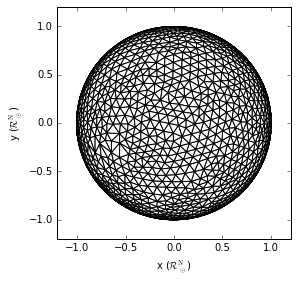

In [29]:
axs, artists = b['mesh@model'].plot()

Any of the 1-D fields (ie not vertices or normals) or matplotlib-recognized colornames can be used to color either the faces or edges of the triangles.  Passing none for edgecolor or facecolor turns off the coloring (you may want to set edgecolor=None if setting facecolor to disable the black outline).

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:257: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:257: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:


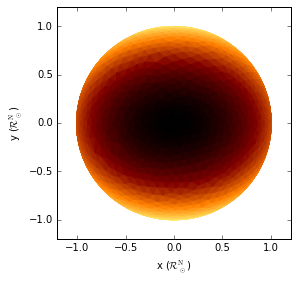

In [30]:
axs, artists = b['mesh@model'].plot(facecolor='teffs', edgecolor=None)

Alternatively, if you provide simple 1-D fields to plot, a 2D x-y plot will be created using the values from each element (always for a single time - if meshes exist for multiple times in the model, you must provide a single time either in the twig or as an argument to plot).

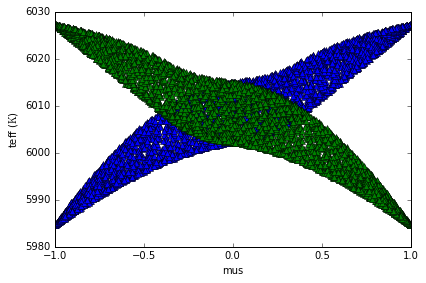

In [31]:
axs, artists = b['mesh@model'].plot(time=0.0, x='mus', y='teffs')

The exception to needing to provide a time is for the per-time parameters mentioned above.  For these, time can be the x-array (not very exciting in this case with only a single time).

For more examples see the following:
- [Passband Luminosity Tutorial](pblum)

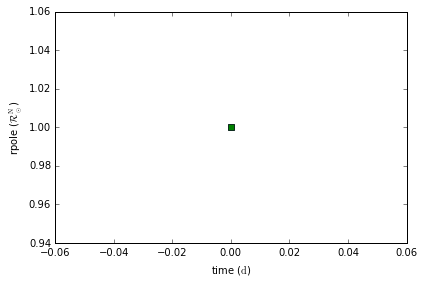

In [32]:
axs, artists = b['mesh@model'].plot(x='times', y='rpole', marker='s')